In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

# Step 2: Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

# Step 3: Preview the dataset
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Basic information about the dataset
print("Shape of the data:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of the data: (569, 31)

Column Names:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Data Types:
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave point

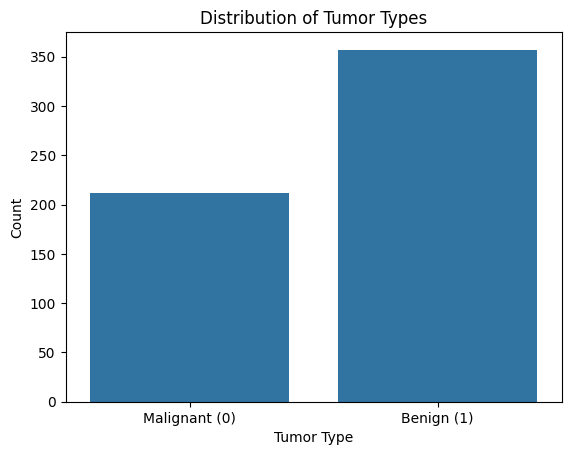

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target')
plt.title("Distribution of Tumor Types")
plt.xticks([0, 1], ['Malignant (0)', 'Benign (1)'])
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

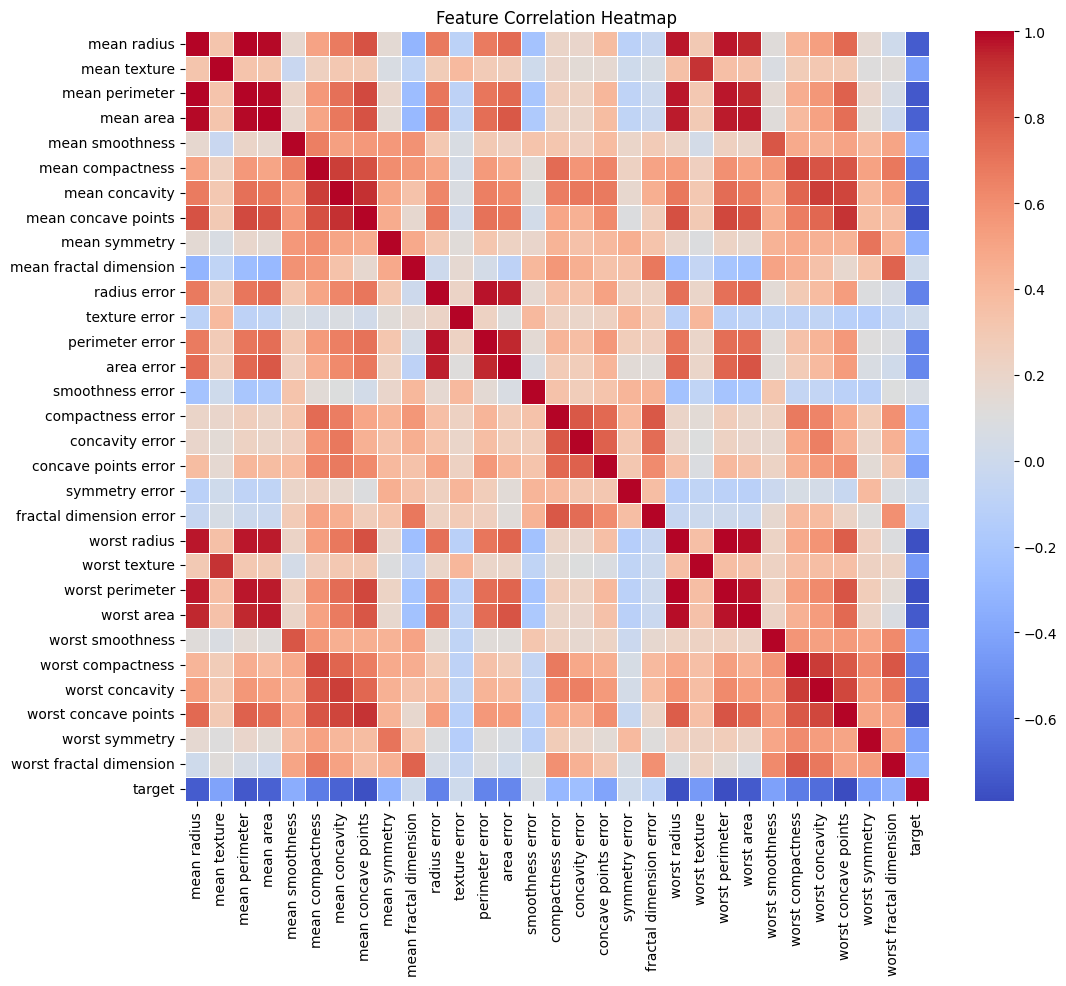

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#Import machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

#Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check shape of split data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (455, 30)
Testing data shape: (114, 30)


In [ ]:
#Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

#Predict on test data
y_pred = model.predict(X_test)

Model Accuracy: 95.61%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



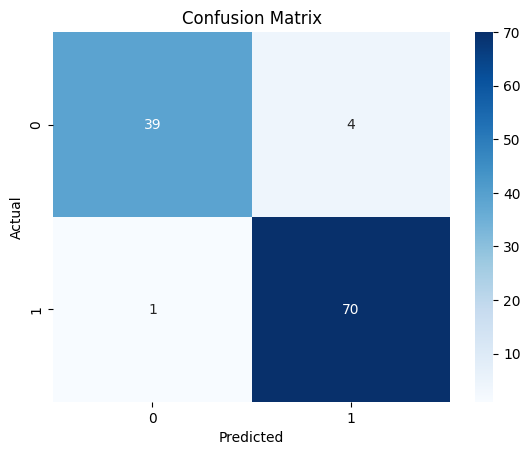

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Accuracy
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(acc * 100))

#Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Breast Cancer Prediction Model Summary:")
print("- Algorithm used: Logistic Regression")
print("- Accuracy on test set: {:.2f}%".format(acc * 100))
print("- Total test samples:", len(y_test))
print("- Correct predictions:", (y_pred == y_test).sum())
print("- Misclassifications:", (y_pred != y_test).sum())

Breast Cancer Prediction Model Summary:
- Algorithm used: Logistic Regression
- Accuracy on test set: 95.61%
- Total test samples: 114
- Correct predictions: 109
- Misclassifications: 5
